In [70]:
log_folder  = 'pretrainedComparison_kaggleModel/' 

In [71]:
import pandas as pd
from collections import defaultdict
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

# Transfer Learning

### Get data

In [72]:
dfs = {}

for filename in os.listdir(log_folder):
    if filename.endswith('.json'):
        filepath = os.path.join(log_folder, filename)
        
        with open(filepath, 'r') as f:
            data = json.load(f)

        for key, metrics in data.items():
            if key in dfs:
                raise ValueError(f"Key '{key}' already exists in DataFrame columns.")
            df = pd.DataFrame(metrics).set_index('epoch')
            dfs[f'{filename[:-5]}-{key}'] = [df]

for key in dfs:
    dfs[key] = pd.concat(dfs[key], ignore_index=False)

df_list_ = list(dfs.keys())

groups = defaultdict(list)
for item in df_list_:
    _, suffix = item.split('-', 1)
    groups[suffix].append(item)

df_list = list(groups.values())

for i, group in enumerate(df_list):
    df_list[i] = sorted(group)
 


### All Metrics

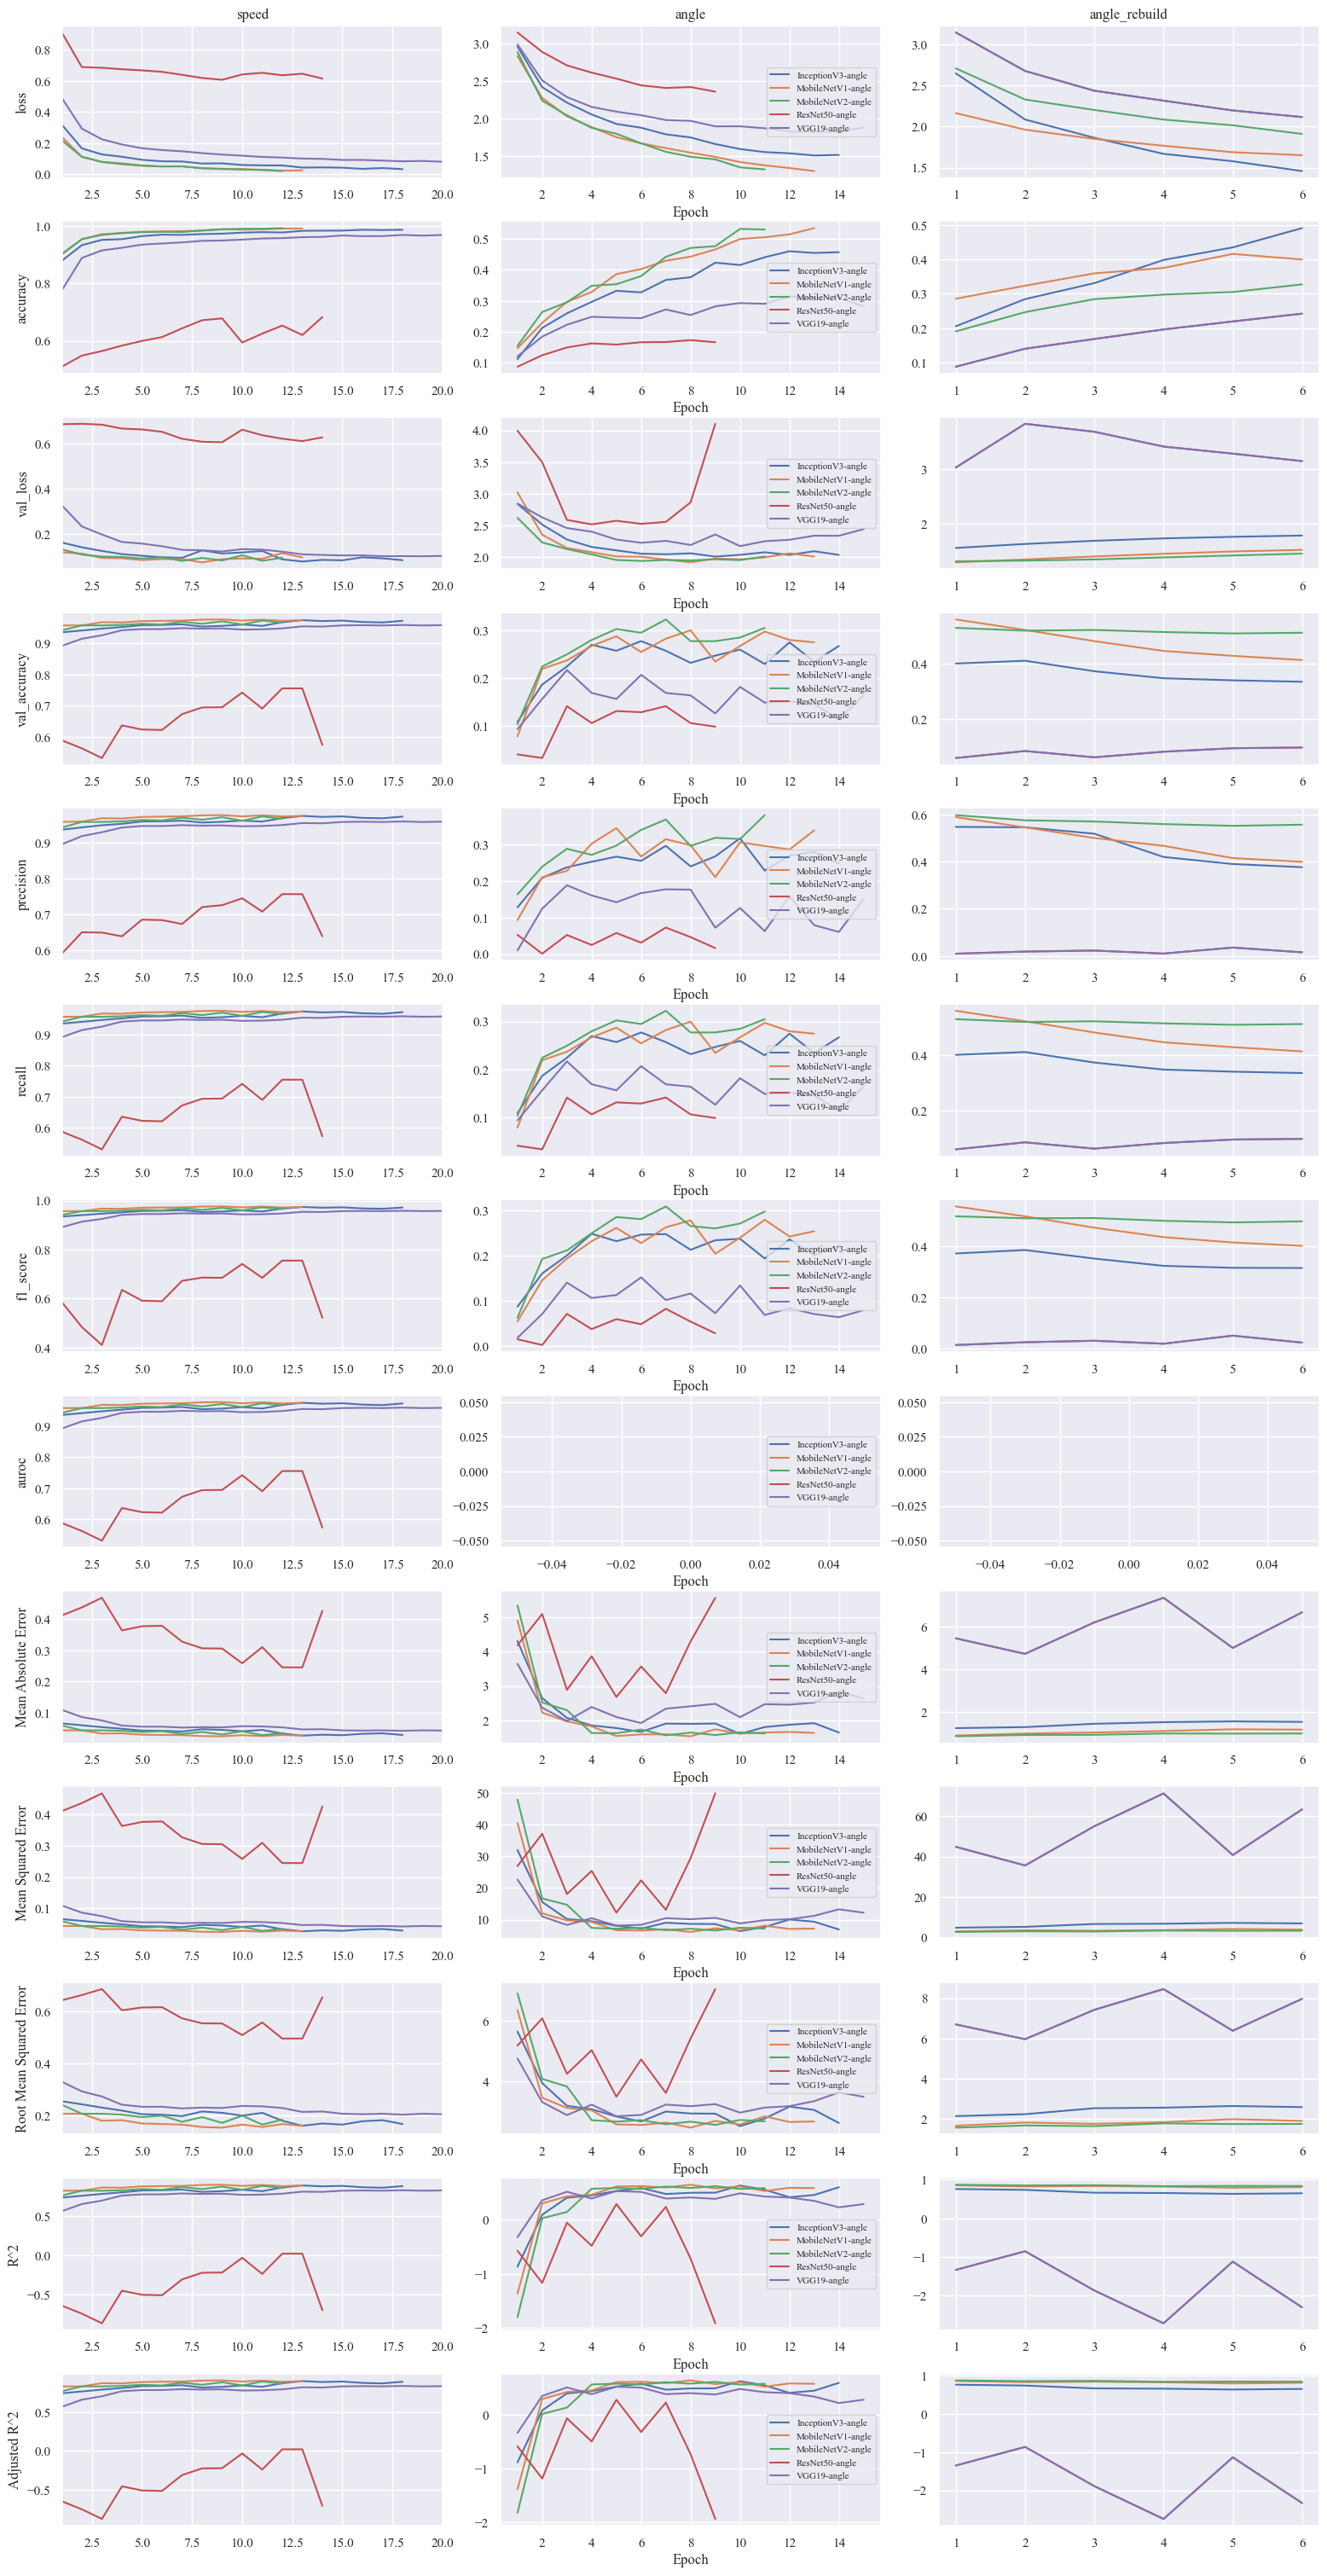

In [73]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(len(dfs[df_list[0][0]].columns), len(df_list), figsize=(len(dfs[df_list[0][0]].columns) * 1.2, len(df_list) * 10))
plt.tight_layout()

for i, group in enumerate(df_list):
    for j, col in enumerate(dfs[group[0]].columns):
        for k, item in enumerate(group):
            df = dfs[item]
            ax[j, i].plot(df.index, df[col], label=item)
        if i == 0:
            ax[j, i].set_ylabel(f'{col}')
            ax[j, i].set_xlim(1, 20)
        if i == 1:
            ax[j, i].legend(prop={'size': 8}, loc='center right')
            ax[j, i].set_xlabel('Epoch')
        if j == 0:
            ax[j, i].set_title(item.split('-')[1])

plt.savefig(f'{log_folder}/img/transferLearning_allMetrics.png', dpi=300, bbox_inches='tight')

### Accuracy

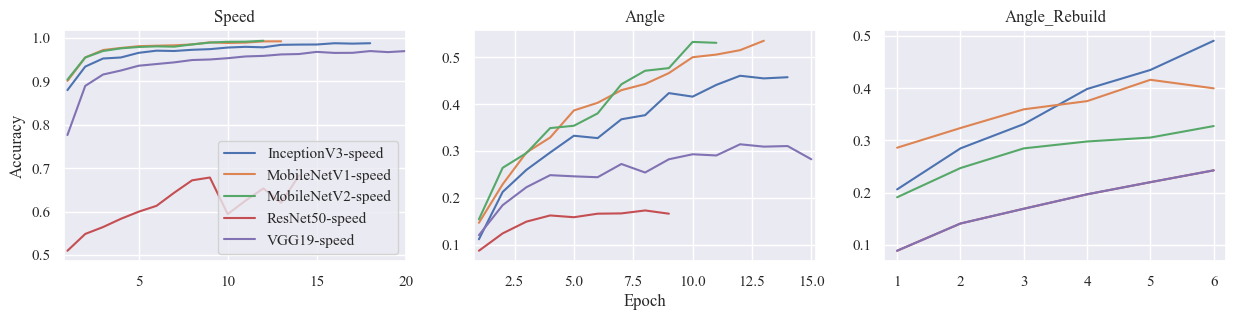

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=len(df_list), figsize=(len(df_list) * 5, len(df_list)))

for i, group in enumerate(df_list):
    for j, item in enumerate(group):
        df = dfs[item]
        ax[i].plot(df.index, df['accuracy'], label=item)

ax[0].set_xlim(0.8, 20)
ax[0].set_title('Speed')
ax[0].set_ylabel('Accuracy')
ax[0].legend(prop={'size': 11}, loc='lower right')
ax[1].set_xlim(0.8, 15.2)
ax[1].set_title('Angle')
ax[1].set_xlabel('Epoch')
ax[2].set_xlim(0.8, 6.2)
ax[2].set_title('Angle_Rebuild')

plt.savefig(f'{log_folder}/img/transferLearning_Accuracy.png')

### Loss

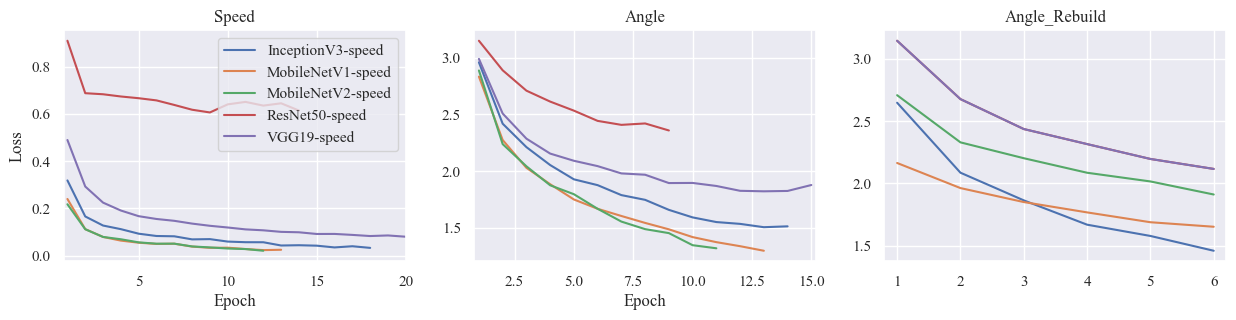

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=len(df_list), figsize=(len(df_list) * 5, len(df_list)))

for i, group in enumerate(df_list):
    for j, item in enumerate(group):
        df = dfs[item]
        ax[i].plot(df.index, df['loss'], label=item)

ax[0].set_xlim(0.8, 20)
ax[0].set_title('Speed')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(prop={'size': 11}, loc='upper right')
ax[1].set_xlim(0.8, 15.2)
ax[1].set_title('Angle')
ax[1].set_xlabel('Epoch')
ax[2].set_xlim(0.8, 6.2)
ax[2].set_title('Angle_Rebuild')

plt.savefig(f'{log_folder}/img/transferLearning_loss.png')

### Validation Accuracy

In [76]:
MobileNetV1_speed_val_accuracy_max = float(dfs['MobileNetV1-speed']['val_accuracy'].max())
MobileNetV2_angle_val_accuracy_max = float(dfs['MobileNetV2-angle']['val_accuracy'].max())

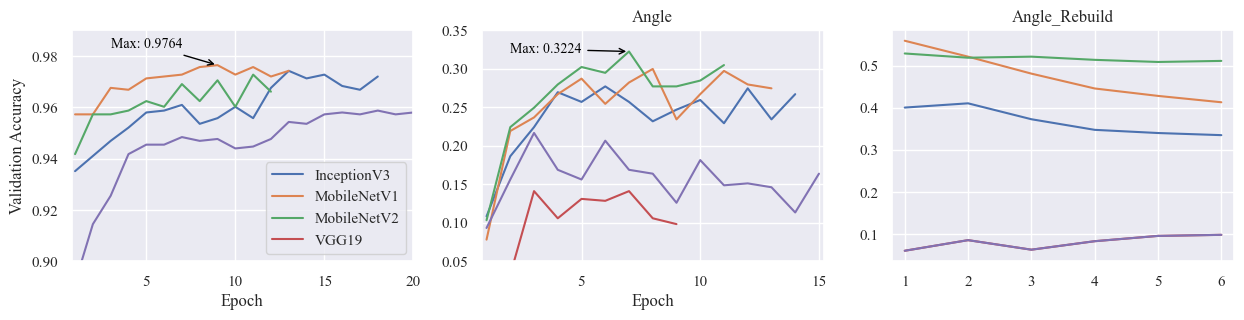

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=len(df_list), figsize=(len(df_list) * 5, len(df_list)))

for i, group in enumerate(df_list):
    for j, item in enumerate(group):
        df = dfs[item]
        ax[i].plot(df.index, df['val_accuracy'], label=item)

ax[0].set_xlim(0.8, 20)
ax[0].set_ylim(0.9, 0.99)
#ax[0].set_title('Speed')
ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].annotate(f'Max: {MobileNetV1_speed_val_accuracy_max:.4f}', xy=(9, MobileNetV1_speed_val_accuracy_max), xytext=(3, 0.983),arrowprops=dict(arrowstyle='->', color='black', lw=1), fontsize=10, color='black')    
ax[0].legend(['InceptionV3', 'MobileNetV1', 'MobileNetV2', 'VGG19'], prop={'size': 11}, loc='lower right') 
ax[1].set_xlim(0.8, 15.2)
ax[1].set_title('Angle')
ax[1].set_xlabel('Epoch')
ax[1].set_xticks([5, 10, 15])
ax[1].annotate(f'Max: {MobileNetV2_angle_val_accuracy_max:.4f}', xy=(7, MobileNetV2_angle_val_accuracy_max), xytext=(2, 0.32),arrowprops=dict(arrowstyle='->', color='black', lw=1), fontsize=10, color='black')
ax[1].set_ylim(0.05,0.35)
ax[2].set_xlim(0.8, 6.2)
ax[2].set_title('Angle_Rebuild')

plt.savefig(f'{log_folder}/img/transferLearning_validationAccuracy.png')

### Validation Loss

In [78]:
MobileNetV1_speed_val_loss_min = float(dfs['MobileNetV1-speed']['val_loss'].min())
MobileNetV1_angle_val_loss_min = float(dfs['MobileNetV1-angle']['val_loss'].min())

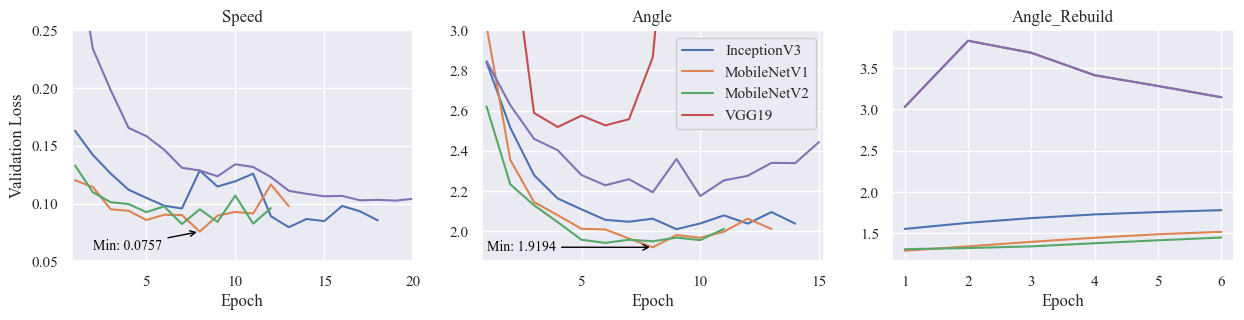

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=len(df_list), figsize=(len(df_list) * 5, len(df_list)))

for i, group in enumerate(df_list):
    for j, item in enumerate(group):
        df = dfs[item]
        ax[i].plot(df.index, df['val_loss'], label=item)
        ax[i].set_xlabel('Epoch')

ax[0].set_xlim(0.8, 20)
ax[0].set_ylim(0.05, 0.25)
ax[0].set_title('Speed')
ax[0].set_ylabel('Validation Loss')
ax[0].annotate(f'Min: {MobileNetV1_speed_val_loss_min:.4f}', xy=(8, MobileNetV1_speed_val_loss_min), xytext=(2, 0.06),arrowprops=dict(arrowstyle='->', color='black', lw=1), fontsize=10, color='black')    
ax[1].set_xlim(0.8, 15.2)
ax[1].set_ylim(1.85, 3)
ax[1].set_title('Angle')
ax[1].set_xlabel('Epoch')
ax[1].set_xticks([5, 10, 15])
ax[1].annotate(f'Min: {MobileNetV1_angle_val_loss_min:.4f}', xy=(8, MobileNetV1_angle_val_loss_min), xytext=(1, 1.9),arrowprops=dict(arrowstyle='->', color='black', lw=1), fontsize=10, color='black')
ax[1].legend(['InceptionV3', 'MobileNetV1', 'MobileNetV2', 'VGG19'],prop={'size': 11}, loc='upper right', framealpha=1)
ax[2].set_xlim(0.8, 6.2)
ax[2].set_title('Angle_Rebuild')

plt.savefig(f'{log_folder}/img/transferLearning_validationLoss.png')

# MobileNetV1

### Get Data

In [80]:
def load_training_logs(filepath):
    dfs = {}
    
    with open(filepath, 'r') as f:
        full_log = json.load(f)

    for sub_name, log_data in full_log.items():
        df = pd.DataFrame({'epoch': log_data.get('epoch', [])})
        df.set_index('epoch', inplace=True)
        metrics = list(log_data.keys())
        if 'epoch' in metrics:
            metrics.remove('epoch')
        # Flatten top-level metrics
        for metric in metrics:
            if metric in log_data:
                df[metric] = log_data[metric]

        dfs[sub_name] = df

    return dfs, list(dfs.keys())

log_dataframes, keys  = load_training_logs(log_folder + 'MobileNetV1.json')

In [81]:
log_dataframes['speed']['loss']
print(keys)

['speed', 'angle', 'angle_rebuild']


### All Metrics

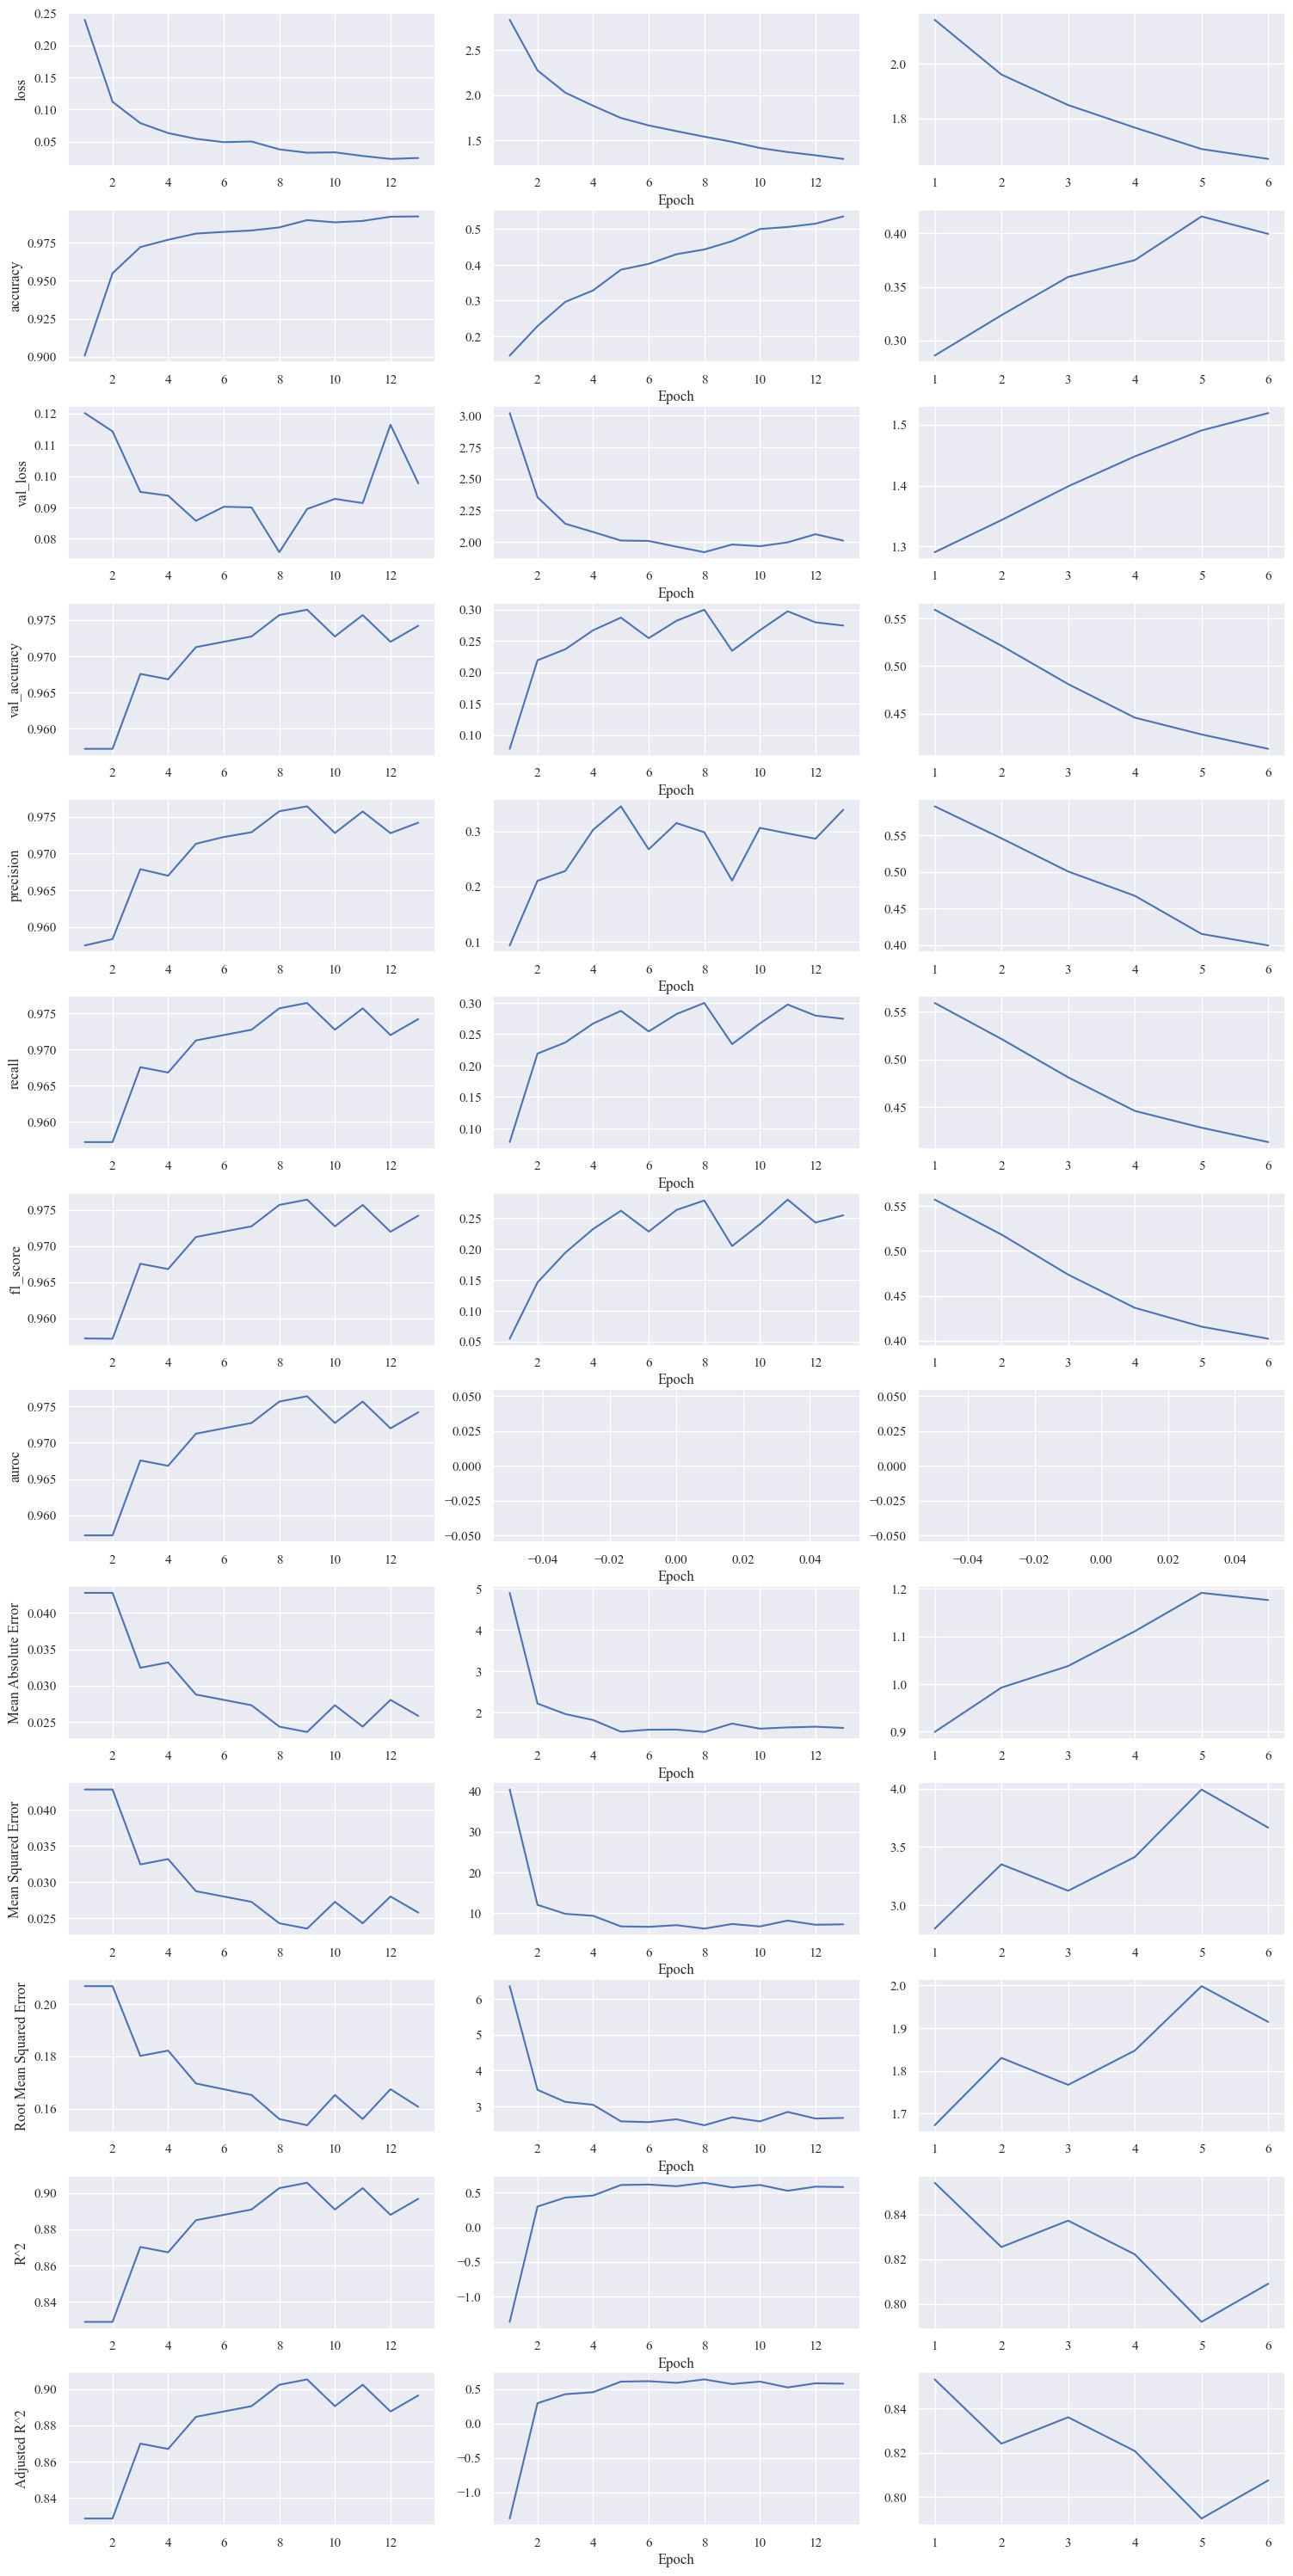

In [82]:
fig, ax = plt.subplots(nrows=len(log_dataframes[keys[0]].columns), ncols=len(keys), figsize=(len(keys) * 5, len(log_dataframes[keys[0]].columns) * 2.3))
plt.tight_layout()

for i, df_name in enumerate(keys):
    for j, col in enumerate(log_dataframes[df_name].columns):
        vals = log_dataframes[df_name][col]
        ax[j, i].plot(vals.index, vals.values)
        if i == 0:
            ax[j, i].set_ylabel(col)
        if i == 1:
            ax[j, i].set_xlabel('Epoch')

plt.savefig(f'{log_folder}/img/MobileNetV1_allMetrics.png', dpi=300, bbox_inches='tight')

### Accuracy and Validation Accuracy

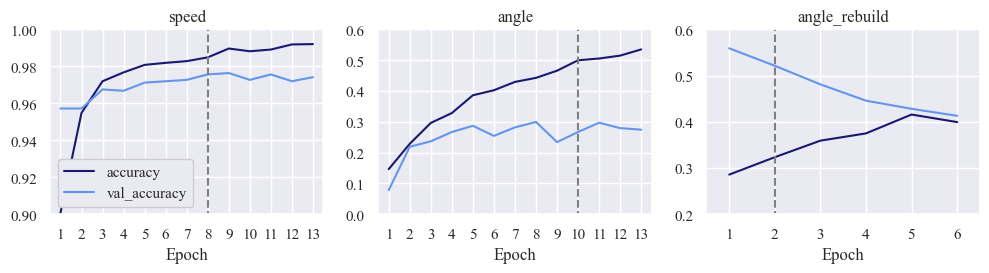

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(len(keys) * 4, len(keys) * 0.8))

for i, df_name in enumerate(keys):
    accuracy = log_dataframes[df_name]['accuracy']
    val_accuracy = log_dataframes[df_name]['val_accuracy']
    ax[i].plot(accuracy.index, accuracy.values, color='midnightblue')
    ax[i].plot(val_accuracy.index, val_accuracy.values, color='cornflowerblue')
    ax[i].set_title(keys[i])
    ax[i].set_xlim(0.5, len(accuracy.index) + 0.5)
    ax[i].set_xticks(range(1, len(accuracy.index) + 1, 1))
    ax[i].set_xlabel('Epoch')
    if i == 0:
        ax[i].legend(['accuracy', 'val_accuracy'], framealpha=1)

ax[0].plot(np.linspace(8, 8, 100), np.linspace(0, 2, 100), color='gray', linestyle='--')
ax[0].set_ylim(0.9, 1)
ax[1].plot(np.linspace(10, 10, 100), np.linspace(-0.5, 5, 100), color='gray', linestyle='--')
ax[1].set_ylim(0, 0.6)
ax[1].set_xlabel('Epoch')
ax[2].plot(np.linspace(2, 2, 100), np.linspace(-0.5, 5, 100), color='gray', linestyle='--')
ax[2].set_ylim(0.2, 0.6)

#fig.legend(['accuracy', 'val_accuracy'])

plt.savefig(f'{log_folder}/img/MobileNetV1_accuracies.png')

### Loss & Validation Loss

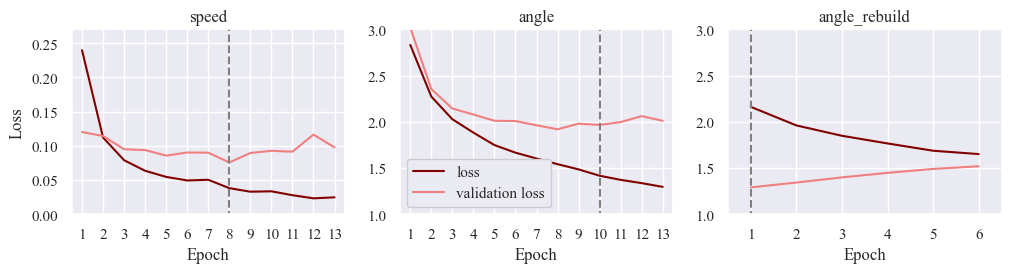

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(len(keys) * 4, len(keys) * 0.8))

for i, df_name in enumerate(keys):
    loss = log_dataframes[df_name]['loss']
    val_loss = log_dataframes[df_name]['val_loss']
    ax[i].plot(loss.index, loss.values, color='maroon')
    ax[i].plot(val_loss.index, val_loss.values, color='lightcoral')
    ax[i].set_title(keys[i])
    ax[i].set_xlim(0.5, len(loss.index) + 0.5)
    ax[i].set_xticks(range(1, len(loss.index) + 1, 1))
    ax[i].set_xlabel('Epoch')
    if i == 0:
        ax[i].set_ylabel('Loss')
    if i == 1:
        ax[i].legend(['loss', 'validation loss'], framealpha=1)

ax[0].plot(np.linspace(8, 8, 100), np.linspace(-0.5, 0.5, 100), color='gray', linestyle='--')
ax[0].set_ylim(0, 0.27)
ax[1].plot(np.linspace(10, 10, 100), np.linspace(-0.5, 5, 100), color='gray', linestyle='--')
ax[1].set_ylim(1, 3)
ax[1].set_xlabel('Epoch')
ax[2].plot(np.linspace(1, 1, 100), np.linspace(-0.5, 5, 100), color='gray', linestyle='--')
ax[2].set_ylim(1, 3)

plt.savefig(f'{log_folder}/img/MobileNetV1_losses.png')